# Value Iteration & Policy Iteration algorithms

On va utiliser l'exemple du monde grille simple. 

![Grid World](https://www.lamsade.dauphine.fr/~airiau/Teaching/M2-IASDapp-RL/gridworld.png)



On va numéroter les états comme suit:

| 7 | 8 | 9 | 10 |
|---|---|----|---|
| **4** |  - | **5** | **6**  |
| **0** | **1** | **2** | **3**  |

Les états finaux sont donc les états 6 et 10.

On a 4 actions disponibles, on les encode de la façon suivante:
* $\uparrow$: 0 
* $\leftarrow$ : 1
* $\downarrow$: 2
* $\rightarrow$ : 3

Ci-dessous, on a entré pour vous la matrice de transition $T$ et la matrice de récompense $R$. Ainsi $T[s_1,a,s_2]$ donne la probabilité d'atteindre l'état $s_2$ en ayant pris l'action $a$ dans l'état $s_1$ et $R[s,a]$ donne la récompense immédiate reçue après avoir pris l'action $a$ dans l'état $s$.

Vous pouvez facilement changer la pénalité pour avancer d'une case en changeant la valeur de la variable `penalty` ci-dessous.

Ce n'est peut-être pas la manière la plus élégante, mais cela suffira pour l'exercice!



In [235]:
import numpy as np
import matplotlib.pyplot as plt
import time
l=0.8
s = 0.1
v_win = 1
v_lose = -1

T = np.zeros((11, 4, 11))
#UP
T[0,0,:]=[s, s, 0, 0, l, 0, 0, 0, 0, 0, 0 ] 
T[1,0,:]=[s, l, s, 0, 0, 0, 0, 0, 0, 0, 0 ]
T[2,0,:]=[0, s, 0, s, 0, l, 0, 0, 0, 0, 0 ]
T[3,0,:]=[0, 0, s, s, 0, 0, l, 0, 0, 0, 0 ]
T[4,0,:]=[0, 0, 0, 0, 2*s, 0, 0, l, 0, 0, 0 ]
T[5,0,:]=[0, 0, 0, 0, 0, s, s, 0, 0, l, 0 ]
T[6,0,:]=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ]
T[7,0,:]=[0, 0, 0, 0, 0, 0, 0, s+l, s, 0, 0 ]
T[8,0,:]=[0, 0, 0, 0, 0, 0, 0, s, l, s, 0 ]
T[9,0,:]=[0, 0, 0, 0, 0, 0, 0, 0, s, l, s ]
T[10,0,:]=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0 ]
#LEFT
T[0,1,:]=[s+l, 0, 0, 0, s, 0, 0, 0, 0, 0, 0 ] 
T[1,1,:]=[l, 2*s, 0, 0, 0, 0, 0, 0, 0, 0, 0 ]
T[2,1,:]=[0, l, s, 0, 0, s, 0, 0, 0, 0, 0 ]
T[3,1,:]=[0, 0, l, s, 0, 0, s, 0, 0, 0, 0 ]
T[4,1,:]=[s, 0, 0, 0, l, 0, 0, s, 0, 0, 0 ]
T[5,1,:]=[0, 0, s, 0, 0, l, 0, 0, 0, s, 0 ]
T[6,1,:]=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ]
T[7,1,:]=[0, 0, 0, 0, s, 0, 0, s+l, 0, 0, 0 ]
T[8,1,:]=[0, 0, 0, 0, 0, 0, 0, l, 2*s, 0, 0 ]
T[9,1,:]=[0, 0, 0, 0, 0, s, 0, 0, l, s, 0 ]
T[10,1,:]=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0 ]
# DOWN
T[0,2,:]=[s+l, s, 0, 0, 0, 0, 0, 0, 0, 0, 0 ] 
T[1,2,:]=[s, l, s, 0, 0, 0, 0, 0, 0, 0, 0 ]
T[2,2,:]=[0, s, l, s, 0, 0, 0, 0, 0, 0, 0 ]
T[3,2,:]=[0, 0, s, l+s, 0, 0, 0, 0, 0, 0, 0 ]
T[4,2,:]=[l, 0, 0, 0, 2*s, 0, 0, 0, 0, 0, 0 ]
T[5,2,:]=[0, 0, l, 0, 0, s, s, 0, 0, 0, 0 ]
T[6,2,:]=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ]
T[7,2,:]=[0, 0, 0, 0, l, 0, 0, s, s, 0, 0 ]
T[8,2,:]=[0, 0, 0, 0, 0, 0, 0, s, l, s, 0 ]
T[9,2,:]=[0, 0, 0, 0, 0, 0, 0, 0, s, l, s ]
T[10,2,:]=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0 ]
#RIGHT
T[0,3,:]=[s, l, 0, 0, s, 0, 0, 0, 0, 0, 0 ] 
T[1,3,:]=[0, 2*s, l, 0, 0, 0, 0, 0, 0, 0, 0 ]
T[2,3,:]=[0, 0, s, l, 0, s, 0, 0, 0, 0, 0 ]
T[3,3,:]=[0, 0, 0, s+l, 0, 0, s, 0, 0, 0, 0 ]
T[4,3,:]=[s, 0, 0, 0, l, 0, 0, s, 0, 0, 0 ]
T[5,3,:]=[0, 0, s, 0, 0, 0, l, 0, 0, s, 0 ]
T[6,3,:]=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ]
T[7,3,:]=[0, 0, 0, 0, s, 0, 0, s, l, 0, 0 ]
T[8,3,:]=[0, 0, 0, 0, 0, 0, 0, 0, 2*s, l, 0 ]
T[9,3,:]=[0, 0, 0, 0, 0, s, 0, 0, 0, s, l ]
T[10,3,:]=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0 ]

penalty= 0.00
R = penalty*np.ones((11,4))
R[10,:]= np.ones(4)*v_win
R[6,:]= np.ones(4)*v_lose

## Value Iteration
Implémentez l'algorithme d'itération sur les valeurs. Pour ce faire, implémentez une fonction qui prend en paramètre:
* $\epsilon$ le paramètre pour le test d'arrêt (dans un premier temps, vous pouvez remplacer ce paramètre par un nombre d'itérations maximal, comme dans l'appel ci-dessou)
* $\gamma$ le taux d'escompte (i.e. la valeur Ã  l'instant t d'obtenir une unité de récompense Ã  l'instant t+1)
* $T$ la matrice de transition
* $R$ la matrice de récompense

La méthode retourne le vecteur $v: S \rightarrow {\mathbb R}$ qui associe Ã  chaque état la valeur optimale de cet état.

La fonction $printV$ ci-dessous affichera les valeurs de $v$ pour le problème du gridworld.

Vous pourrez ainsi tester si vous retrouvez les valeurs de l'exemple montré en cours. 

### Function

In [236]:
def value_iteration(iter, epsilon, gamma, T, R):
    """
        This function executes the value iteration algorithm in order to find the optimal value function v

        Args:
            - epsilon (float): convergence criteria
            - gamma (float): discount factor
            - T(2D array): transition model
            - R(2D array): reward model
        
        Output:
            - v (1D array): the value function v: S -> R
    """
    # Initializing S (states), A (actions), v (states values)
    S = np.arange(11)
    v = np.zeros(11)
    delta = np.inf

    # Vectorized iteration without looping over states
    for i in range(iter):
        v_temp = np.copy(v)
        
        # Sum on axis 2 with 3D array: sum on columns (expected t+1 value for each states)
        # Max on axis 1 with 2D array: max on columns (i.e. best action reward) for each states
        v = np.max(R + gamma * np.sum(T * v, axis=2), axis=1)
        
        # Convergence test, delta is the highest gap
        delta = np.max(np.abs(v_temp - v))
        if delta < epsilon: break

    print(f"Converged in {i} iterations")
    return v

In [237]:
# plot the best policy given the value function v:
# i.e. plot the best action for each state given the value function v.

def plotBestPolicy(v, gamma):
  bestV=np.zeros(11)
  bestA=np.zeros(11)
  fig, ax = plt.subplots()
  # policy extraction
  for s1 in range(11):
    val=[]
    for a in range(4):
      va=0
      for s2 in range(11):
        va += T[s1,a,s2]*v[s2]
      val= val+[ R[s1,a]+gamma*va ]
    bestV[s1]=np.max(val)
    bestA[s1]=np.argmax(val)

    matV= np.array( [[bestV[7], bestV[8], bestV[9], bestV[10]],
                    [bestV[4],   -1 , bestV[5], bestV[6]],
                    [bestV[0], bestV[1], bestV[2], bestV[3]]]
                    )
    matA = np.array([
                    [bestA[7], bestA[8], bestA[9], -1],
                    [bestA[4],   -1 , bestA[5], -1],
                    [bestA[0], bestA[1], bestA[2], bestA[3]]])

    im = ax.imshow(matV)


  for i in range(matV.shape[0]):
      for j in range(matV.shape[1]):
          if matA[i][j]==-1:
              arrow = ''
          elif matA[i, j] == 0:
              arrow = '^'
          elif matA[i, j] == 1:
              arrow = '<'
          elif matA[i, j] == 2:
              arrow = 'v'
          elif matA[i, j] == 3:
              arrow = '>'
          text = ax.text(j, i, arrow, ha = "center", va = "center",
                         color = "black")
            
  cbar = ax.figure.colorbar(im, ax = ax)
    
  fig.tight_layout()
  plt.show() 

In [238]:
def printV(v):
  print('| {:03.2f} | {:03.2f} | {:03.2f} | {:03.2f} |'.format(v[7], v[8], v[9], v[10]))
  print('| {:03.2f} | ---- | {:03.2f} | {:03.1f} |'.format(v[4], v[5], v[6]))
  print('| {:03.2f} | {:03.2f} | {:03.2f} | {:03.2f} |'.format(v[0], v[1], v[2], v[3]))
  

### Compute

In [239]:
# Mesurer et afficher le temps d'exécution pour valueIteration_2
start_time = time.time()
w = value_iteration(100, 0.001, 0.9, T, R)
end_time = time.time()

print("Temps d'exécution pour valueIteration: {:.4f} secondes".format(end_time - start_time))
printV(w)

Converged in 15 iterations
Temps d'exécution pour valueIteration: 0.0005 secondes
| 0.64 | 0.74 | 0.85 | 1.00 |
| 0.57 | ---- | 0.57 | -1.0 |
| 0.49 | 0.43 | 0.48 | 0.28 |


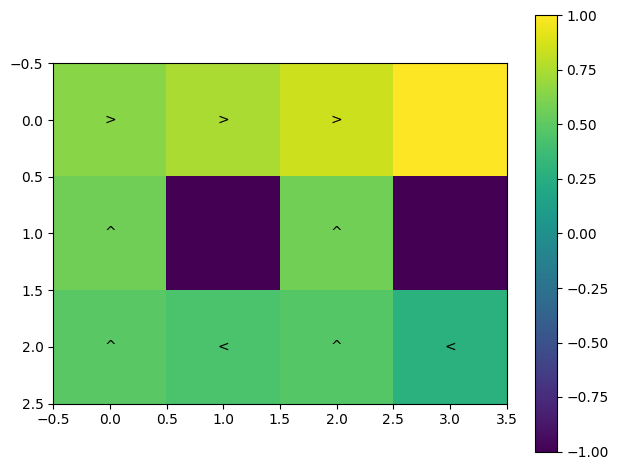

In [240]:
plotBestPolicy(w2, 0.9)

## Policy Iteration

Implement the policy iteration algorithm. To debug, you can draw the policy using the functions above (to view the value function and/or the associated policy.


| 7 | 8 | 9 | 10 |
|---|---|----|---|
| **4** |  - | **5** | **6**  |
| **0** | **1** | **2** | **3**  |

* $\uparrow$: 0 
* $\leftarrow$ : 1
* $\downarrow$: 2
* $\rightarrow$ : 3

### Functions

In [241]:
def policy_iteration(iter, gamma, T, R):
    """
        Performs policy iteration to compute the optimal policy for a Markov Decision Process (MDP).
        
        Parameters:
            iter (int): The maximum number of iterations for the policy iteration process.
            gamma (float): The discount factor for future rewards (0 <= gamma <= 1).
            T (3D numpy.ndarray): The transition probability matrix of shape (S, A, S)
            R (2D numpy.ndarray): The reward matrix of shape (S, A)
            
        Returns:
            pi (2D numpy.ndarray): The optimal policy matrix of shape (S, A), 
                where each element `pi[s, a]` indicates the probability of choosing action `a` in state `s`. 
                After convergence, each state has a deterministic policy with a probability of 1 or the optimal action.
            v_pi (numpy.ndarray): The value function array of shape (S,)
                where `v_pi[s]` is the expected cumulative reward for each state `s` under the optimal policy.
    """

    # Environment
    S = np.arange(11)
    A = np.arange(4)
    v_pi = np.zeros(11)
    pi = np.full((S.size, A.size), 1/A.size) # policy intialized as a uniform distribution

    for i in range(iter):
        # Calculating MDP components
        T_pi = np.sum(pi.T * T, axis = 1) # 3D array (states, action, state): axis 1 for suming on actions
        R_pi = np.sum(pi * R, axis = 1) # 2D array (states, actions) axis 1 for summing on actions.

        # Calculating v_pi policy
        v_pi = R_pi + gamma * np.dot(T_pi, v_pi)

        # Calculating q_pi policy
        q_pi = R + gamma * np.sum(T*v_pi, axis = 2)

        # For each state s in S, for each action a in A, testing q_pi(s, a) > v_pi(s)
        # If any of q_pi(s, a) > v_pi(s)
        #       We update our policy pi(s) = argmax_a[q_pi(s, a)]
        # Else:
        #       We found the optimal policy

        # We create a 2D array (states.size, actions.size +1) by stacking q_pi and v_pi where the last column is v_pi for ach state.
        argmax_list = strict_argmax(np.column_stack([q_pi, v_pi[:, np.newaxis]]))
        
        # Updating pi
        old_pi = pi.copy()
        for s, argmax in enumerate(argmax_list):
            if argmax != None: pi[s], pi[s, argmax] = 0, 1 # Updating pi for states where we found a better q_pi(s, a) with 1 for the given a, setting 0 for every other a

        # Convergence test
        if np.all(pi == old_pi): break
    
    print(f"Converged in {i + 1} iterations")
    
    return pi, v_pi

In [242]:
def strict_argmax(arr, axis=1):
    """
    Mostly generated by chatgpt

    This funcion helps calculating the strict argmax_a[q_pi(s,a), v(s)] for each state.
    Warning: if the v_pi value is the strict max (i.e. if the strict argmax = 4), we will consider it as None because we only search for states where q_pi > v_pi

    Args:
        arr (2D array): an array (states, actions + 1) where columns are the q_pi value stacked with v_pi value
        axis (int): the axis along which we want to perform the argmax, default is 1 in our case

    Returns:
        argmax (1D array): the argmax for each states (i.e. the best action), None if no strict argmax
    """

    # Step 1: Find the max values and indices along the specified axis
    max_indices = np.argmax(arr, axis=axis)
    max_values = np.max(arr, axis=axis, keepdims=True)

    # Step 2: Check if each max is unique along the specified axis
    is_unique = np.sum(arr == max_values, axis=axis) == 1
    
    # Step 3: Return indices where max is unique; otherwise, set to None and also argmax = 4 to None
    strict_indices = np.where(is_unique, max_indices, None)
    strict_indices = np.where(strict_indices != 4, strict_indices, None)
    
    return strict_indices

### Compute

Converged in 7 iterations
Temps d'exécution pour policy_iteration : 0.0013 secondes

[[1.   0.   0.   0.  ]
 [0.   1.   0.   0.  ]
 [0.   1.   0.   0.  ]
 [0.   1.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.25 0.25 0.25 0.25]]
| 0.17 | 0.22 | 0.25 | 1.00 |
| 0.02 | ---- | -0.24 | -1.0 |
| 0.01 | 0.00 | -0.19 | -0.40 |


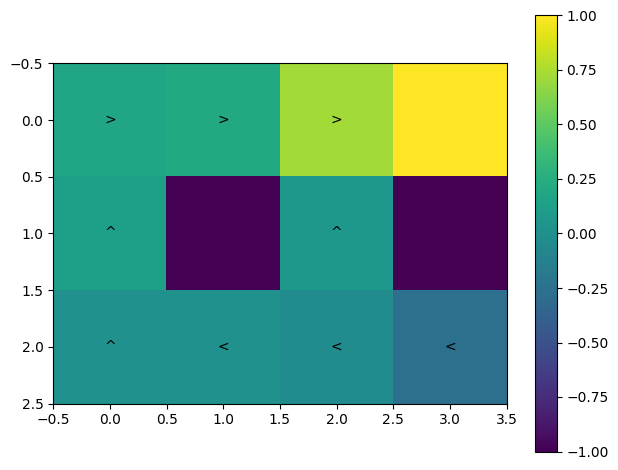

In [250]:
# Mesurer et afficher le temps d'exécution pour valueIteration_2
start_time = time.time()
pi, v_pi = policy_iteration(100, 0.9, T, R)
end_time = time.time()

print("Temps d'exécution pour policy_iteration : {:.4f} secondes\n".format(end_time - start_time))
print(pi)
printV(v_pi)
plotBestPolicy(v_pi, 0.9)

# Sandbox

### Comparing value iteration implementations

In [244]:
def value_iteration_2(iter, epsilon, gamma, T, R):
    """
        This function executes the value iteration algorithm in order to find the optimal value function v

        Args:
            - epsilon (float): convergence criteria
            - gamma (float): discount factor
            - T(2D array): transition model
            - R(2D array): reward model
        
        Output:
            - v (1D array): the value function v: S -> R
    """
    # Initializing S (states), A (actions), v (states values)
    S = np.arange(11)
    A = np.arange(4)
    v = np.zeros(11)
    delta = np.inf

    # Convergence test
    for i in range(iter):
        delta_list = []
        for state in S:
            v_temp = v[state]
            # In the first round, if we have negative updated v values, it will not be updated with max()
            # because v values are initialized to 0
            # Therefore np.sum(T[state][action] * v) = 0
            # So R[state][action] + gamma * np.sum(T[state][action] * v = R[state][action]
            if i == 0:
                v[state] = np.max(R[state])
            
            # Else, we just apply max value for every action
            else: 
                v[state] = max(
                    v[state],
                    max(R[state] + gamma * np.sum(T[state] * v, axis=1)) # axis = 1 so np.sum sums on rows (first axis) 
                )

            if v_temp != v[state]: delta_list.append(np.abs(v_temp - v[state]))
            
        delta = max(delta_list)
        # Convergence criteria
        if delta < epsilon: break

    print(f"Converged in {i} iterations")
    return v

In [245]:
import time

# Mesurer et afficher le temps d'exécution pour valueIteration_0
start_time = time.time()
w0 = value_iteration_2(100, 0.001, 0.9, T, R)
end_time = time.time()
print("Temps d'exécution pour valueIteration_0 : {:.4f} secondes".format(end_time - start_time))
printV(w0)
print("\n")

# Mesurer et afficher le temps d'exécution pour valueIteration_2
start_time = time.time()
w2 = value_iteration(100, 0.001, 0.9, T, R)
end_time = time.time()
print("Temps d'exécution pour valueIteration_2 : {:.4f} secondes".format(end_time - start_time))
printV(w2)


Converged in 12 iterations
Temps d'exécution pour valueIteration_0 : 0.0008 secondes
| 0.64 | 0.74 | 0.85 | 1.00 |
| 0.57 | ---- | 0.57 | -1.0 |
| 0.49 | 0.43 | 0.48 | 0.28 |


Converged in 15 iterations
Temps d'exécution pour valueIteration_2 : 0.0005 secondes
| 0.64 | 0.74 | 0.85 | 1.00 |
| 0.57 | ---- | 0.57 | -1.0 |
| 0.49 | 0.43 | 0.48 | 0.28 |


## Building policy iteration function

In [246]:
# Function parameters
gamma = 0.9

# Environment
S = np.arange(11)
A = np.arange(4)
v_pi = np.zeros(11)
pi = np.full((S.size, A.size), 1/A.size) # policy intialized as a uniform distribution

# Calculating MDP components
T_pi = np.sum(pi.T * T, axis = 1) # 3D array (states, action, state): axis 1 for suming on actions
R_pi = np.sum(pi * R, axis = 1) # 2D array (states, actions) axis 1 for summing on actions.

# Calculating v_pi policy
v_pi = R_pi + gamma * np.dot(T_pi, v_pi)

# Calculating q_pi policy
q_pi = R + gamma * np.sum(T*v_pi, axis = 2)

print(pi)

print(v_pi)
print(q_pi)

# For each state s in S, for each action a in A, testing q_pi(s, a) > v_pi(s)
# If any of q_pi(s, a) > v_pi(s)
#       We update our policy pi(s) = argmax_a[q_pi(s, a)]
# Else:
#       We found the optimal policy

# We create a 2D array (states, actions +1) by stacking q_pi and v_pi where the last column is v_pi for ach state.
argmax_list = strict_argmax(np.column_stack([q_pi, v_pi[:, np.newaxis]]))
print(argmax_list)

# Updating pi
for s, argmax in enumerate(argmax_list):
    if argmax != None: pi[s], pi[s, argmax] = 0, 1

print(pi)

[[0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]]
[ 0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  1.]
[[ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [-0.72 -0.09  0.   -0.09]
 [ 0.    0.    0.    0.  ]
 [-0.09  0.   -0.09 -0.72]
 [-1.   -1.   -1.   -1.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.09  0.    0.09  0.72]
 [ 1.    1.    1.    1.  ]]
[None None None None None None None None None 3 None]
[[0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.   0.   0.   1.  ]
 [0.25 0.25 0.25 0.25]]


In [247]:
# Function parameters
gamma = 0.9
iter = 100

# Environment
S = np.arange(11)
A = np.arange(4)
v_pi = np.zeros(11)
pi = np.full((S.size, A.size), 1/A.size) # policy intialized as a uniform distribution

for i in range(iter):
    # Calculating MDP components
    T_pi = np.sum(pi.T * T, axis = 1) # 3D array (states, action, state): axis 1 for suming on actions
    R_pi = np.sum(pi * R, axis = 1) # 2D array (states, actions) axis 1 for summing on actions.

    # Calculating v_pi policy
    v_pi = R_pi + gamma * np.dot(T_pi, v_pi)

    # Calculating q_pi policy
    q_pi = R + gamma * np.sum(T*v_pi, axis = 2)

    # For each state s in S, for each action a in A, testing q_pi(s, a) > v_pi(s)
    # If any of q_pi(s, a) > v_pi(s)
    #       We update our policy pi(s) = argmax_a[q_pi(s, a)]
    # Else:
    #       We found the optimal policy

    # We create a 2D array (states.size, actions.size +1) by stacking q_pi and v_pi where the last column is v_pi for ach state.
    print(np.column_stack([q_pi, v_pi[:, np.newaxis]]))
    argmax_list = strict_argmax(np.column_stack([q_pi, v_pi[:, np.newaxis]]))
    print(argmax_list, "\n")
    
    # Updating pi
    old_pi = pi.copy()
    for s, argmax in enumerate(argmax_list):
        if argmax != None: pi[s], pi[s, argmax] = 0, 1

    # Convergence test
    if np.all(pi == old_pi): break

print(f"Converged in {i + 1} iterations")

print(pi)

[[ 0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.  ]
 [-0.72 -0.09  0.   -0.09  0.  ]
 [ 0.    0.    0.    0.    0.  ]
 [-0.09  0.   -0.09 -0.72  0.  ]
 [-1.   -1.   -1.   -1.   -1.  ]
 [ 0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.  ]
 [ 0.09  0.    0.09  0.72  0.  ]
 [ 1.    1.    1.    1.    1.  ]]
[None None None None None None None None None 3 None] 

[[ 0.       0.       0.       0.       0.     ]
 [ 0.       0.       0.       0.       0.     ]
 [-0.18225 -0.02025 -0.02025 -0.18225  0.     ]
 [-0.74025 -0.11025 -0.18225 -0.27225 -0.225  ]
 [ 0.       0.       0.       0.       0.     ]
 [ 0.05175 -0.14175 -0.11025 -0.69975 -0.225  ]
 [-1.      -1.      -1.      -1.      -1.     ]
 [ 0.       0.       0.       0.       0.     ]
 [ 0.02025  0.       0.02025  0.162    0.     ]
 [ 0.252    0.       0.252    0.72     0.225  ]
 [ 1.       1.       1.       1.       1.     ]]
[None None None 1 None 0 None None 3 3 None] 

[[ 0